In [3]:
import pandas as pd
df_cars=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto ML\src\USA_cars_datasets.csv")

In [4]:
df_cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [6]:
df_cars.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [7]:
df_cars.nunique()

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [8]:
# eliminar columnas 
df_cars.drop(columns=['Unnamed: 0','vin','lot'],inplace=True)

In [9]:
# Transformar de millas a kilómetros
df_cars['km'] = df_cars['mileage'] * 1.60934

df_cars.drop(columns=['mileage'], inplace=True)

In [10]:
df_cars = df_cars[df_cars['title_status'] != 'salvage insurance']

In [11]:
from datetime import datetime
# Obtener el año actual
current_year = datetime.now().year

# Calcular la edad del vehículo
df_cars['year'] = current_year - df_cars['year']

In [12]:
df_cars.head(15)

,price,brand,model,year,title_status,color,state,country,condition,km
0,6300,toyota,cruiser,16,clean vehicle,black,new jersey,usa,10 days left,441147.45278
1,2899,ford,se,13,clean vehicle,silver,tennessee,usa,6 days left,306662.95568
2,5350,dodge,mpv,6,clean vehicle,silver,georgia,usa,2 days left,63713.77060
3,25000,ford,door,10,clean vehicle,blue,virginia,usa,22 hours left,103232.72364
4,27700,chevrolet,1500,6,clean vehicle,red,florida,usa,22 hours left,10708.54836
5,5700,dodge,mpv,6,clean vehicle,white,texas,usa,2 days left,73323.13974
6,7300,chevrolet,pk,14,clean vehicle,black,georgia,usa,22 hours left,239872.12700
7,13350,gmc,door,7,clean vehicle,gray,california,usa,20 hours left,37859.72350
8,14600,chevrolet,malibu,6,clean vehicle,silver,florida,usa,22 hours left,15081.12514
9,5250,ford,mpv,7,clean vehicle,black,texas,usa,2 days left,102061.12412


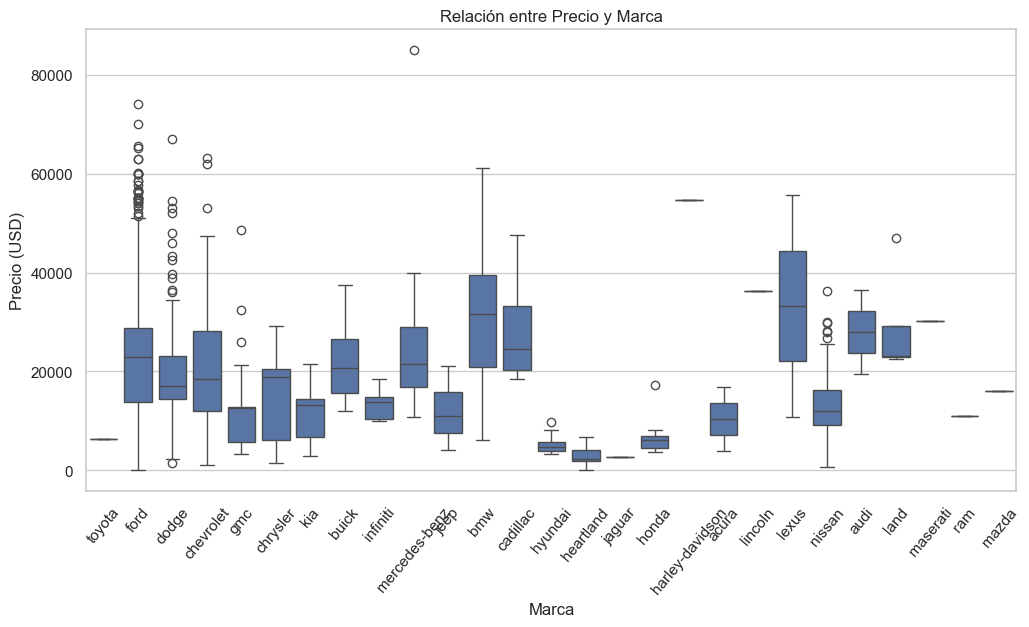

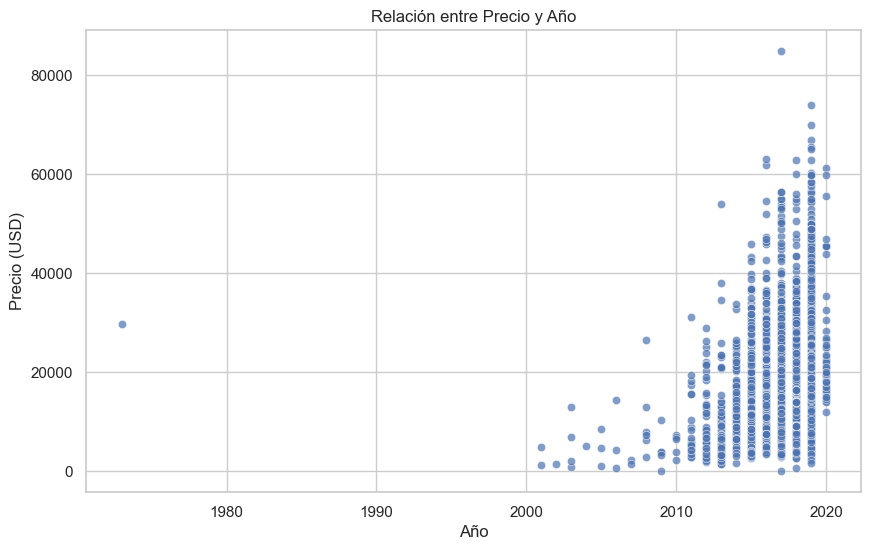

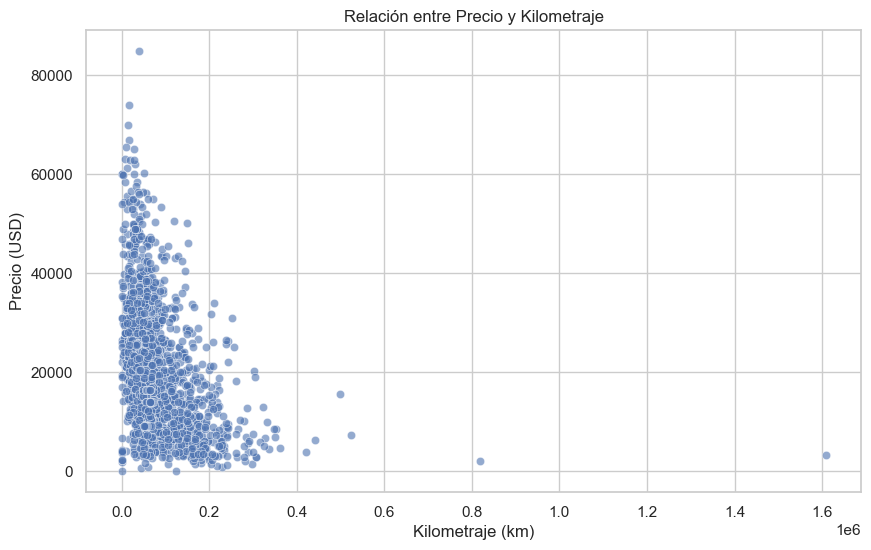

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Gráfico 1: Relación entre price y brand (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cars, x="brand", y="price")
plt.title("Relación entre Precio y Marca")
plt.xticks(rotation=50)
plt.ylabel("Precio (USD)")
plt.xlabel("Marca")
plt.show()

# Gráfico 2: Relación entre price y year (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cars, x="year", y="price", alpha=0.7)
plt.title("Relación entre Precio y Año")
plt.ylabel("Precio (USD)")
plt.xlabel("Año")
plt.show()

# Gráfico 3: Relación entre price y km (scatterplot)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cars, x="km", y="price", alpha=0.6)
plt.title("Relación entre Precio y Kilometraje")
plt.ylabel("Precio (USD)")
plt.xlabel("Kilometraje (km)")
plt.show()


In [14]:
# Calcular coeficientes de Pearson entre price y otras variables numéricas
pearson_corr = df_cars[['price', 'year', 'km']].corr()

# Mostrar la matriz de correlación
print("Coeficiente de correlación de Pearson:")
print(pearson_corr)

Coeficiente de correlación de Pearson:
          price      year        km
price  1.000000 -0.319972 -0.361493
year  -0.319972  1.000000  0.609149
km    -0.361493  0.609149  1.000000


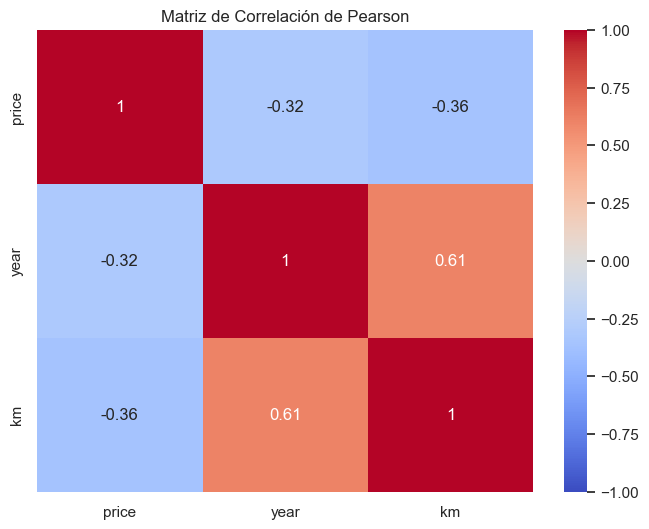

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Pearson')
plt.show()

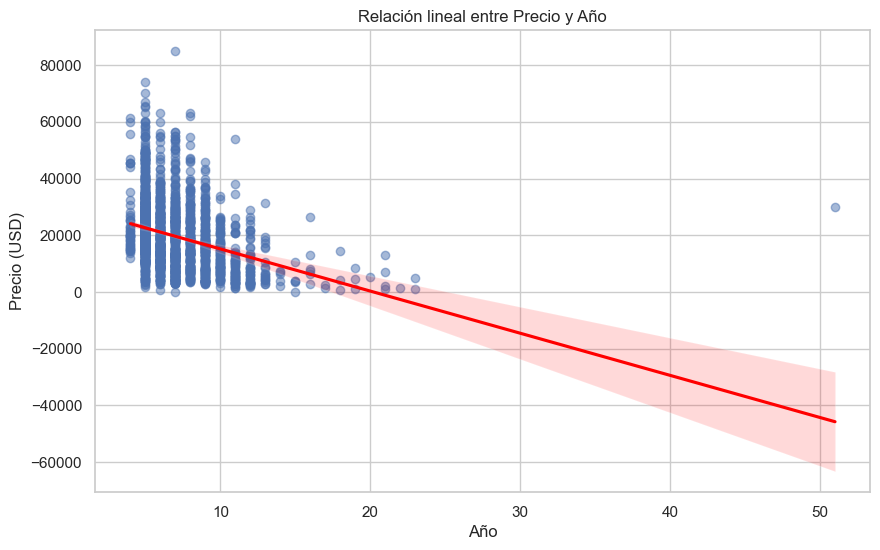

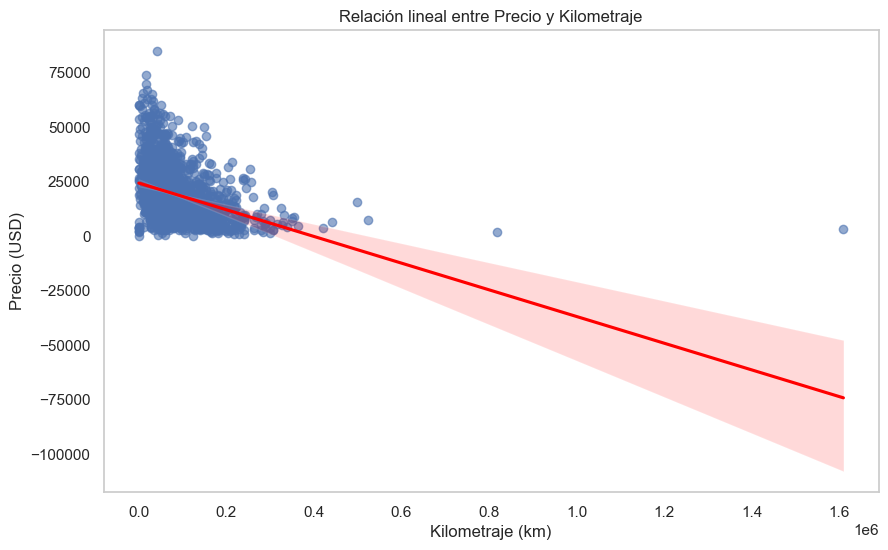

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Gráfico de dispersión y línea de regresión entre precio y año
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cars, x="year", y="price", scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Relación lineal entre Precio y Año")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.show()

# Gráfico de dispersión y línea de regresión entre precio y kilometraje
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cars, x="km", y="price", scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("Relación lineal entre Precio y Kilometraje")
plt.xlabel("Kilometraje (km)")
plt.ylabel("Precio (USD)")
plt.grid()
plt.show()


## REGRESION LINEAL 

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
X = df_cars[['year', 'km']]
y = df_cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrenar el modelo de regresión lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape= mean_absolute_percentage_error(y_test,y_pred_linear)

print(f"Regresión Lineal - MSE: {mse_linear}, R2: {r2_linear} , MAPE:{mape}")

Regresión Lineal - MSE: 110980519.44682021, R2: 0.15673439918134902 , MAPE:0.7904462559562402


## Regresion Polinomica 

In [12]:

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# entrenar el modelo de regresión polinomial
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

# Evalur
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mape=mean_absolute_percentage_error(y_test, y_pred_poly)

print(f"Regresión Polinomial - MSE: {mse_poly}, R2: {r2_poly}, MAPE:{mape}")

Regresión Polinomial - MSE: 109590395.668717, R2: 0.1672970057432711, MAPE:0.7724752971182547


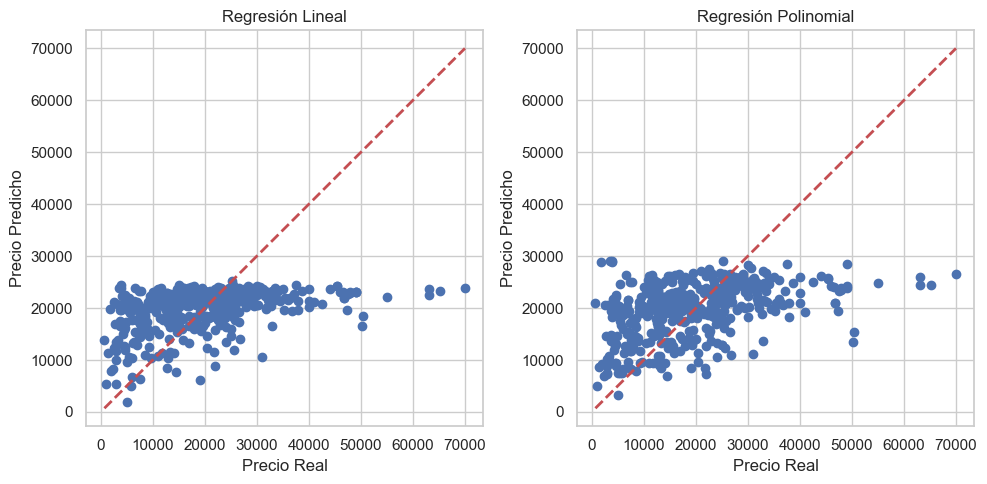

In [29]:
plt.figure(figsize=(10, 5))

# Regresión Lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Lineal')

# Regresión Polinomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Polinomial')

plt.tight_layout()
plt.show()

## R.F

In [112]:
from sklearn.ensemble import RandomForestRegressor
features = ['year', 'km', 'brand', 'model', 'state']
X = df_cars[features]
y = df_cars['price']
# variables categóricas
X = pd.get_dummies(X, columns=['brand', 'model', 'state'])
# entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  entrenar modelo R.F
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicciones
y_pred = rf_model.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R2 Score: {r2}")
print(f"MAPE:{mape}")

Error cuadrático medio: 44753135.51773846
R2 Score: 0.6599513148884841
MAPE:0.4219039936124184


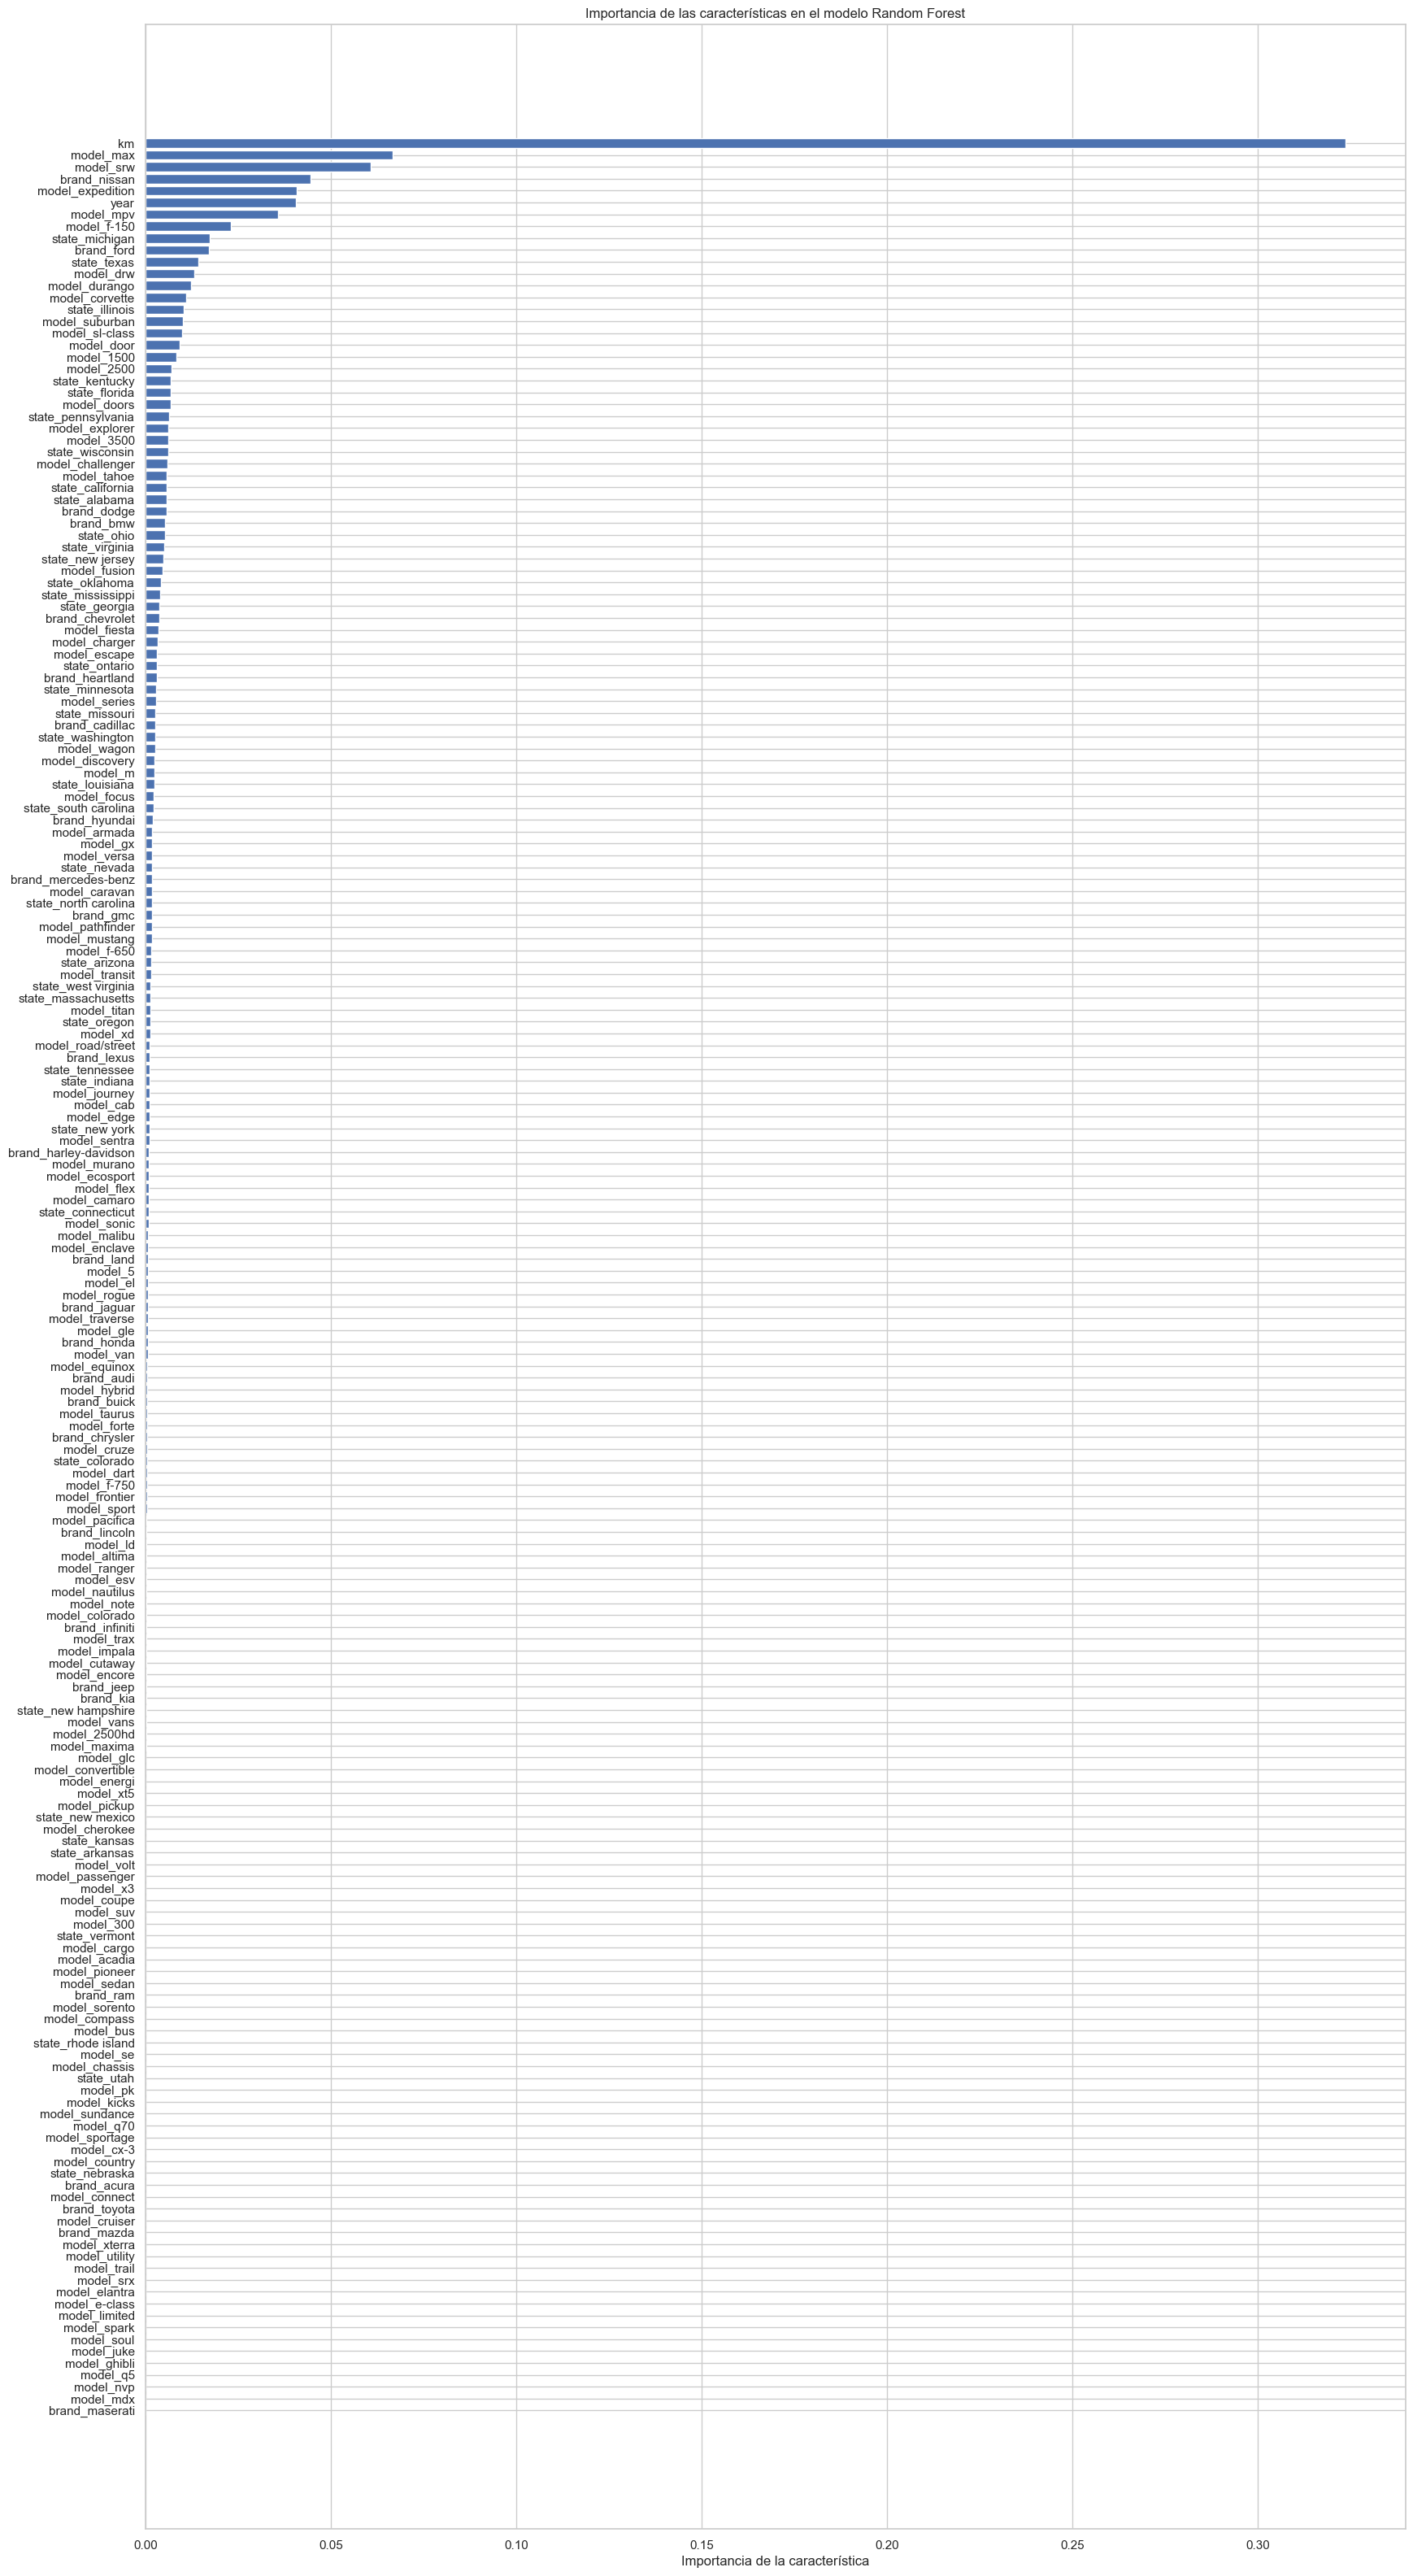

In [113]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Ordenar las características por importancia
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20, 40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en el modelo Random Forest')
#plt.grid()
plt.show()

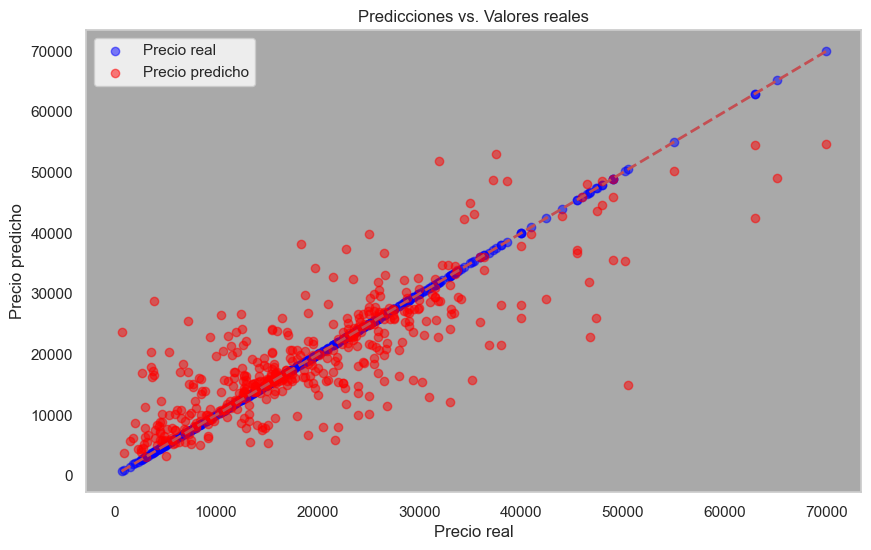

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Precio real')
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Precio predicho')
#plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.gca().set_facecolor('darkgrey')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs. Valores reales')
plt.grid()
plt.legend()
plt.show()

# R.F para clasificar el estado del vehículo 

In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
features = ['price', 'year', 'km', 'state']
X = df_cars[features]
y = df_cars['title_status']
# variables categóricas
le = LabelEncoder()
X.loc[:,'state'] = le.fit_transform(X['state'])
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrenar  modelo R.F
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicciones
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# importancia de las características
feature_importance = rf_model.feature_importances_
for feature, importance in zip(features, feature_importance):
    print(f"Importancia de {feature}: {importance:.4f}")

Precisión del modelo: 1.00

Informe de clasificación:
               precision    recall  f1-score   support

clean vehicle       1.00      1.00      1.00       468

     accuracy                           1.00       468
    macro avg       1.00      1.00      1.00       468
 weighted avg       1.00      1.00      1.00       468

Importancia de price: 0.0000
Importancia de year: 0.0000
Importancia de km: 0.0000
Importancia de state: 0.0000


### Gráfico de barras

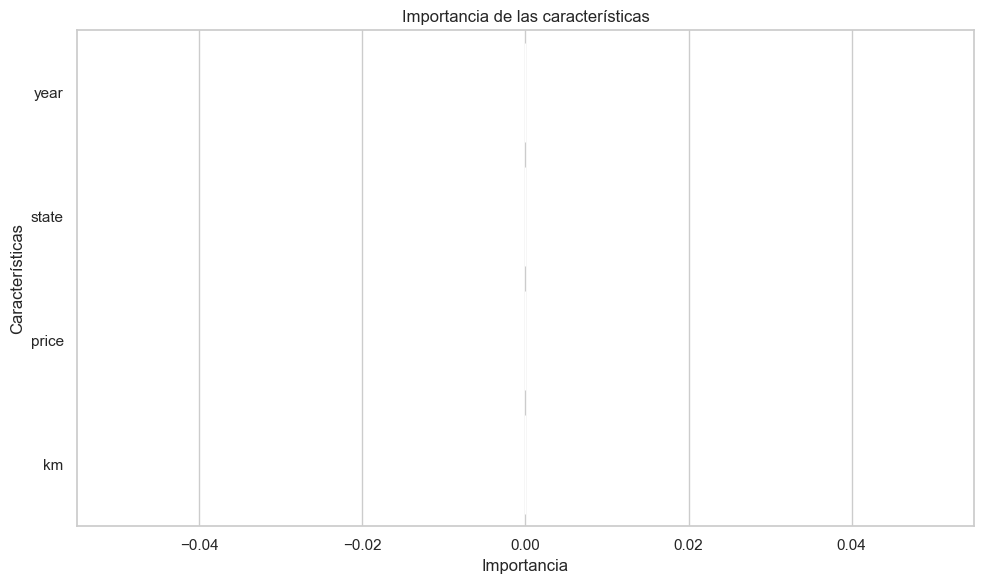

In [116]:
plt.figure(figsize=(10, 6))
feature_importance = rf_model.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, features), reverse=True)
importance, features = zip(*feature_importance_sorted)

sns.barplot(x=importance, y=features)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

### Matriz de confusión

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


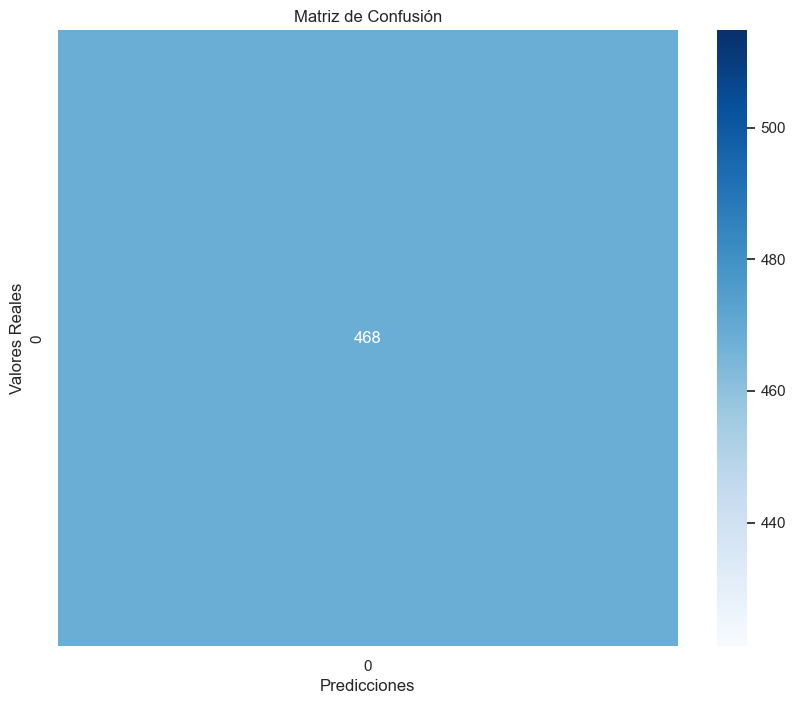

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#### CURVA ROC 

In [118]:
from sklearn.metrics import roc_curve, auc

# Asumiendo que es una clasificación binaria
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

## k-means (agrupar vehiculos similalres)

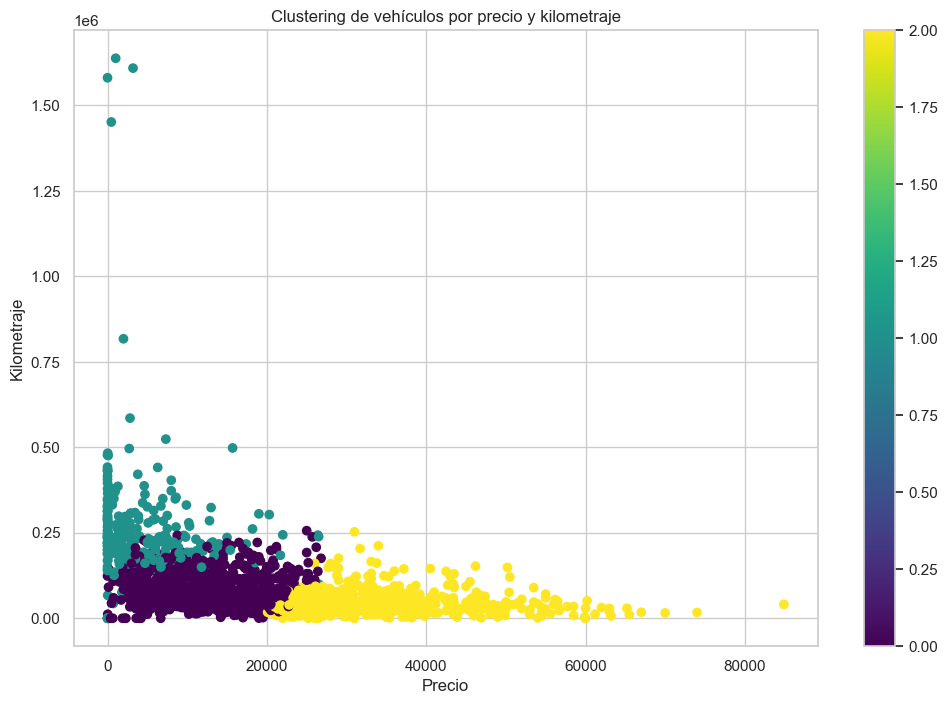

Centroide del cluster 0:
  Precio: $13267.86
  Año: 2017
  Kilometraje: 74934
Centroide del cluster 1:
  Precio: $4803.37
  Año: 2010
  Kilometraje: 256880
Centroide del cluster 2:
  Precio: $31649.95
  Año: 2018
  Kilometraje: 42566


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['price', 'year', 'km']
X = df_cars[features]

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cars['cluster'] = kmeans.fit_predict(X_scaled)

# resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cars['price'], df_cars['km'], c=df_cars['cluster'], cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Kilometraje')
plt.title('Clustering de vehículos por precio y kilometraje')
plt.colorbar(scatter)
plt.show()

# Analizar los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Centroide del cluster {i}:")
    print(f"  Precio: ${centroid[0]:.2f}")
    print(f"  Año: {centroid[1]:.0f}")
    print(f"  Kilometraje: {centroid[2]:.0f}")